In [1]:
import pandas
import numpy as np
import io
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM


In [2]:
# load the new file
datasett = read_csv('./FB_.csv', header=0)


In [3]:
datasett.head()

,Unnamed: 0,symbol,date,open,high,low,close,volume,adj_close,prev_day_diff,50_day_moving_avg,10_day_volatility,s&p_index_open,s&p_index_high,s&p_index_low,s&p_index_close,s&p_index_volume,s&p_index_adj_close
0,0,FB,2012-05-18,0.020657,0.021838,0.018921,0.018783,573576400,0.018783,0.000000,38.230000,0.000000,1305.050049,1312.239990,1291.979980,1295.219971,4.512470e+09,1295.219971
1,1,FB,2012-05-21,0.017945,0.017791,0.016432,0.016720,168192700,0.016720,-4.200001,36.129999,2.100000,1295.729980,1316.390015,1295.729980,1315.989990,3.786750e+09,1315.989990
2,2,FB,2012-05-22,0.016020,0.016301,0.015406,0.015231,101786600,0.015231,-3.029999,34.419999,3.419999,1316.089966,1328.489990,1310.040039,1316.630005,4.123680e+09,1316.630005
3,3,FB,2012-05-23,0.015411,0.015772,0.015615,0.015722,73600000,0.015722,1.000000,33.814999,1.814999,1316.020020,1320.709961,1296.530029,1318.859985,4.108330e+09,1318.859985
4,4,FB,2012-05-24,0.016187,0.016116,0.015819,0.016228,50237200,0.016228,1.029999,33.657999,0.628000,1318.719971,1324.140015,1310.500000,1320.680054,3.937670e+09,1320.680054


In [4]:
dataset=datasett[['date','adj_close']]

In [5]:
dataset.head()

,date,adj_close
0,2012-05-18,0.018783
1,2012-05-21,0.016720
2,2012-05-22,0.015231
3,2012-05-23,0.015722
4,2012-05-24,0.016228


In [6]:
dataset.shape

(956, 2)

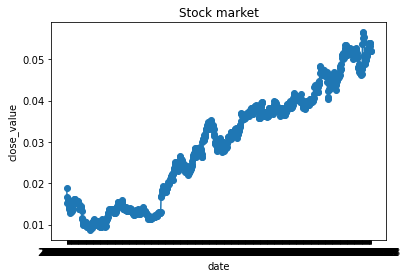

In [7]:
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
from datetime import datetime, timedelta
plt.plot_date(dataset['date'],dataset['adj_close'],linestyle='solid')
plt.xlabel('date')
plt.ylabel('close_value')
plt.title('Stock market')
plt.show()

In [8]:
# split into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset.values)

In [9]:
# we will create a dataset where X are the real values and y are the next day values (the forecasting to be learned by the model)
def create_dataset(dataset, look_back=1):
	X, y = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 1]
		X.append(a)
		y.append(dataset[i + look_back, 1])
	return array(X), array(y)

In [10]:
# Create a training & testing data where X are the real values and y are the next day values
X_train, y_train = create_dataset(train)
X_test, y_test = create_dataset(test)

In [11]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

In [12]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [13]:
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [15]:
# train the model
def build_model(X_train, y_train):
	# prepare data
	# X_train, y_train = train[:,0], train[:,1] # REMOVED
	# define parameters
	verbose, epochs, batch_size = 1, 150, 16
	n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], 1 # Output always 1 here and you can't get it from the shape

	# define model
	model = Sequential()
	model.add(LSTM(128, activation='relu', input_shape=(n_timesteps, n_features), return_sequences=True))
	model.add(LSTM(64, activation='relu', return_sequences=True))
	model.add(LSTM(32, activation='relu'))
	model.add(Dense(16, activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mse', optimizer='adam')
	model.summary()
	# fit network
	model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model


In [16]:
model=build_model(X_train, y_train)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 128,929
Trainable params: 128,929
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
45/45 [==============================] - 0s 3ms/step - loss: 2.7428e-04
Epoch 2/150
45/45 [=============

In [17]:
prediction = model.predict(X_test)
prediction

array([[0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.03072609],
       [0.030

In [18]:
from sklearn.metrics import mean_squared_error
import math

In [19]:
# Get the root mean squared error
math.sqrt(mean_squared_error(y_test, prediction))

0.013354823092696947

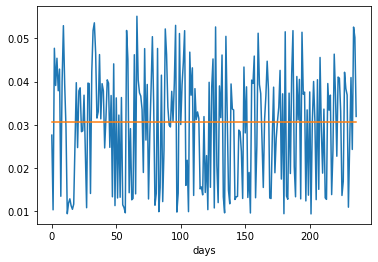

In [20]:
days = ['mon', 'tue', 'wed', 'thr', 'fri', 'sat' , 'sun']
plt.xlabel('days')
pyplot.plot(y_test,)
pyplot.plot(prediction)
pyplot.show()